<a href="https://colab.research.google.com/github/Ajlag/cifar10_neural_network/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
#ucitavanje mnist dataset-a
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#priprema podataka -> normalizuju se ulazni podaci na rasponu od 0 do 1 i prisiri se dimenzija podataka
x_train, x_test = x_train / 255.0 , x_test / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [4]:
#definise se cnn model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [5]:
#kompilacija modela sa funkcijom gubitka, optimizatorom i metrikom
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
#treniranje modela na trening podacima
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 55s 28ms/step - loss: 0.1244 - accuracy: 0.9621 - val_loss: 0.0488 - val_accuracy: 0.9845
Epoch 2/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0334 - val_accuracy: 0.9893
Epoch 3/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0288 - accuracy: 0.9908 - val_loss: 0.0329 - val_accuracy: 0.9885
Epoch 4/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0312 - val_accuracy: 0.9894
Epoch 5/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.0309 - val_accuracy: 0.9897


In [7]:
# da bi se saznala tacnost modela koristi se metoda evaluacije
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0309 - accuracy: 0.9897


In [8]:
print(test_loss)

0.030916009098291397


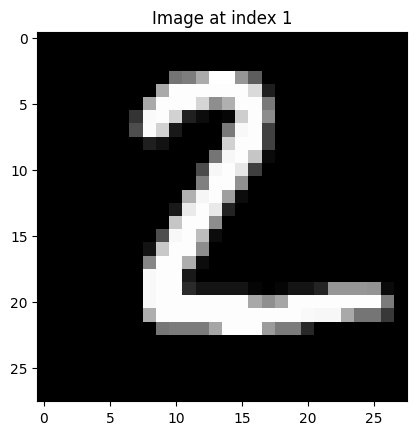

In [13]:
#da prikazemo sliku sa nekim indexom
import matplotlib.pyplot as plt

index=1

plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title(f'Image at index {index}')
plt.show()

1/1 [==============================] - 0s 23ms/step


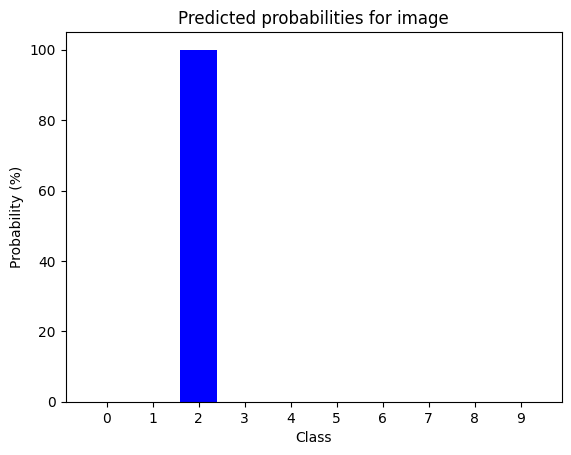

In [14]:
import numpy as np

prediction = model.predict(x_test[index:index+1])

predicted_probabilities = prediction[0] * 100
classes = np.arange(len(predicted_probabilities))

plt.bar(classes, predicted_probabilities, color='blue')
plt.xlabel('Class')
plt.ylabel('Probability (%)')
plt.title('Predicted probabilities for image')
plt.xticks(classes)
plt.show()